In [8]:
# auto reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import cns
import numpy as np
import matplotlib.pyplot as plt
from cns.data_utils import save_doc_fig

[0, 45.232896495018046, 45.51987927927016, 45.80880177097237, 46.09951425149022, 46.391834153771676, 46.68553981082769, 46.98036299227478, 47.27597999103434, 47.5720009757559, 47.867957269191294, 48.16328614709426, 48.45731267458212, 48.749228005469, 49.038063462988774, 49.32265959576381, 49.601629259326224, 49.87331361011658, 50.13572971610167, 50.386508288635596, 50.622819830322264, 50.84128728580679, 51.03788309845431, 51.20780845220084, 51.34535247315269, 51.443729371786155, 51.494892065038044, 51.48932194037492, 51.415796423034614, 51.261139329557516, 51.00996425204096, 50.644429225621316, 50.14403265463093, 49.485496885254285, 48.64280748250157, 47.58750247378414, 46.289332919974285, 44.71743508137013, 42.842147615875255, 40.63754713947339, 38.084629208574384, 35.17480929020121, 31.91308864325638, 28.319943588004715, 24.430968271315823, 20.29374253910985, 15.962317457084925, 11.490766147082397, 6.92785221824799, 2.3145929786540975, -2.3145929786541233, -6.927852218247996, -11.490

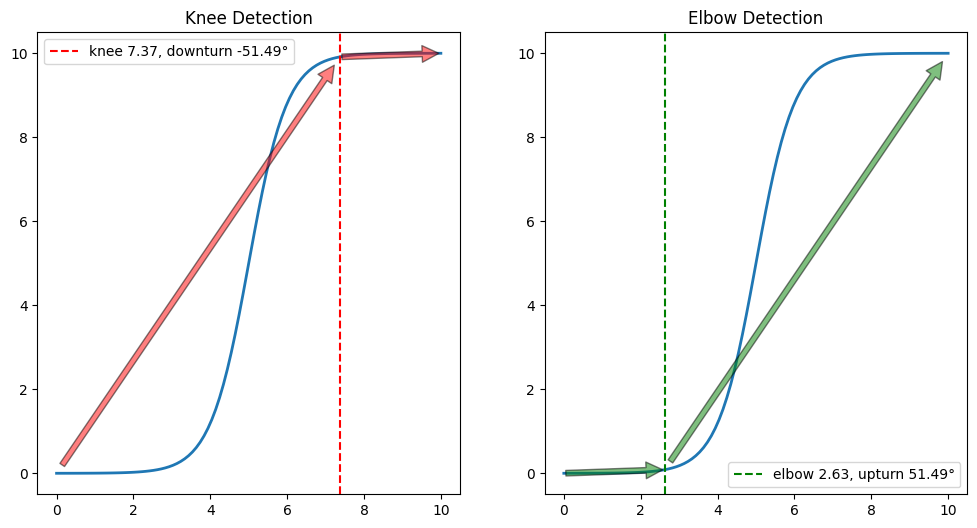

In [53]:
def logistic(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k * (x - x0)))

# Generate points for the x-axis
test_x = np.linspace(0, 10, 100)
# Calculate the corresponding y-values using the logistic function
y_up = logistic(test_x, L=10, k=2, x0=5)

# Find knee and elbow points
knee, knee_val = cns.find_knee(test_x, y_up, True)
elbow, elbow_val = cns.find_knee(test_x, y_up, False)

# Create a figure with two subplots side by side
configs = [
    {
        'title': "Knee Detection",
        'line_color': 'r',
        'label': f'knee {test_x[knee]:.2f}, downturn {knee_val:.2f}°',
        'point': knee,
        'point_val': knee_val
    },
    {
        'title': "Elbow Detection",
        'line_color': 'g',
        'label': f'elbow {test_x[elbow]:.2f}, upturn {elbow_val:.2f}°',
        'point': elbow,
        'point_val': elbow_val
    }
]

# Plot data and annotations
arrow_alpha = 0.5
arrow_shrink = 0.02
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for i, plot in enumerate(configs):
    ax = axs[i]
    point = plot['point']
    line_color = plot['line_color']
    label = plot['label']
    
    ax.plot(test_x, y_up, linewidth=2)
    ax.axvline(x=test_x[point], color=line_color, linestyle='--', label=label)
    ax.annotate('', xy=(test_x[point], y_up[point]), xytext=(test_x[0], y_up[0]),
                arrowprops=dict(facecolor=line_color, alpha=arrow_alpha, shrink=arrow_shrink))
    ax.annotate('', xy=(test_x[-1], y_up[-1]), xytext=(test_x[point], y_up[point]),
                arrowprops=dict(facecolor=line_color, alpha=arrow_alpha, shrink=arrow_shrink))
    ax.legend()
    ax.set_title(plot['title'])

save_doc_fig('knee_detection')

[0, -45.23289649501802, -45.519879279270825, -45.80880177097267, -46.09951425149035, -46.39183415377176, -46.68553981082776, -46.98036299227488, -47.27597999103442, -47.57200097575595, -47.867957269191415, -48.16328614709429, -48.45731267458225, -48.74922800546906, -49.03806346298881, -49.32265959576386, -49.601629259326295, -49.87331361011662, -50.13572971610172, -50.38650828863566, -50.622819830322285, -50.84128728580682, -51.037883098454344, -51.20780845220085, -51.345352473152715, -51.443729371786205, -51.494892065038094, -51.48932194037497, -51.41579642303466, -51.261139329557544, -51.00996425204101, -50.644429225621344, -50.144032654630955, -49.48549688525429, -48.64280748250158, -47.58750247378417, -46.28933291997431, -44.71743508137017, -42.84214761587528, -40.63754713947342, -38.084629208574405, -35.17480929020122, -31.913088643256405, -28.319943588004737, -24.43096827131584, -20.29374253910986, -15.962317457084945, -11.490766147082415, -6.9278522182480025, -2.3145929786541166

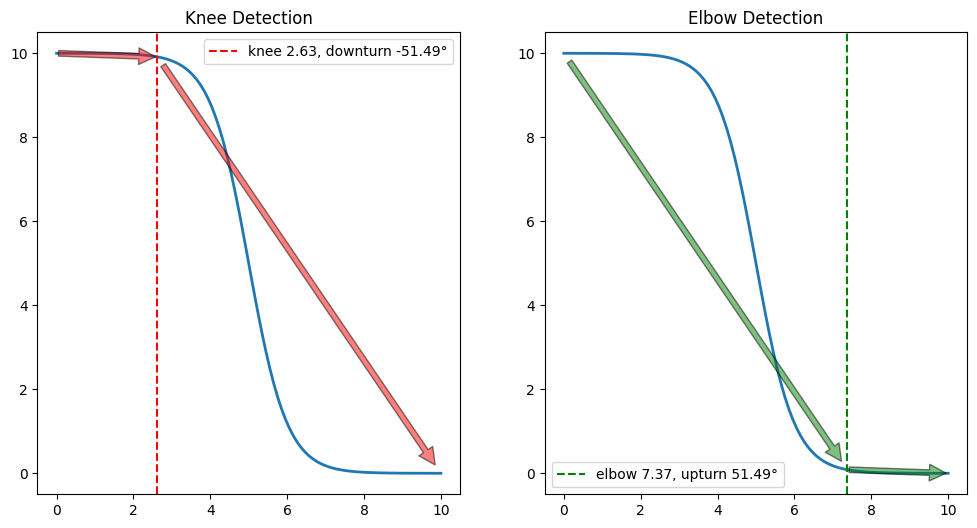

In [54]:
# Calculate the corresponding y-values using the logistic function
y_down = 10 - y_up

# Find knee and elbow points
knee, knee_val = cns.find_knee(test_x, y_down, True)
elbow, elbow_val = cns.find_knee(test_x, y_down, False)

# Create a figure with two subplots side by side
configs = [
    {
        'title': "Knee Detection",
        'line_color': 'r',
        'label': f'knee {test_x[knee]:.2f}, downturn {knee_val:.2f}°',
        'point': knee,
        'point_val': knee_val
    },
    {
        'title': "Elbow Detection",
        'line_color': 'g',
        'label': f'elbow {test_x[elbow]:.2f}, upturn {elbow_val:.2f}°',
        'point': elbow,
        'point_val': elbow_val
    }
]

# Plot data and annotations
arrow_alpha = 0.5
arrow_shrink = 0.02
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for i, plot in enumerate(configs):
    ax = axs[i]
    point = plot['point']
    line_color = plot['line_color']
    label = plot['label']
    
    ax.plot(test_x, y_down, linewidth=2)
    ax.axvline(x=test_x[point], color=line_color, linestyle='--', label=label)
    ax.annotate('', xy=(test_x[point], y_down[point]), xytext=(test_x[0], y_down[0]),
                arrowprops=dict(facecolor=line_color, alpha=arrow_alpha, shrink=arrow_shrink))
    ax.annotate('', xy=(test_x[-1], y_down[-1]), xytext=(test_x[point], y_down[point]),
                arrowprops=dict(facecolor=line_color, alpha=arrow_alpha, shrink=arrow_shrink))
    ax.legend()
    ax.set_title(plot['title'])

save_doc_fig('knee_detection_inverted')